# Proyek Analisis Data: Nama dataset
- Nama:Tanto Wijaya
- Email: tanto.twjy@gmail.com
- Id Dicoding: tanto1602

## Menentukan Pertanyaan Bisnis

- pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
- pertanyaan 2: Berapa pengaruh jenis musim terhadap jumlah sepeda yang disewakan?
- pertanyaan 3: Bagaimana peforma penyewaan sepeda setiap jam?


## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Memuat tabel day
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Memuat tabel hour
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### Informasi Atribut:
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0:2011 and 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius.
- atemp: Normalized feeling temperature in Celsius.
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registeredl and registeredh casual and registered

### Assessing Data

#### Menilai data day_df

In [4]:
# Memeriksa tipe data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Memeriksa duplikasi dan parameter statistik day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
# Memeriksa tipe data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
# Memeriksa duplikasi dan parameter statistik hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [8]:
# Mengganti tipe data pada kolom dteday menjadi datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [9]:
# Memeriksa kembali tipe data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [10]:
# Mengganti tipe data pada kolom dteday menjadi datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [11]:
# Memeriksa kembali tipe data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore data day_df

In [12]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [13]:
day_df.groupby(by="weathersit").agg({
    "casual": ["min", "max", "mean", "std"],
    "registered": ["min", "max", "mean", "std"]
})

casual                               registered                     \
              min   max        mean         std        min   max         mean   
weathersit                                                                      
1              15  3410  964.030238  700.476488        416  6946  3912.755940   
2               9  3155  687.352227  619.082767        491  6844  3348.510121   
3               2  1264  185.476190  260.975022         20  4324  1617.809524   

                         
                    std  
weathersit               
1           1533.347265  
2           1463.566884  
3           1068.290954

In [14]:
day_df.groupby(by="season").agg({
    "casual": ["min", "max", "mean", "std"],
    "registered": ["min", "max", "mean", "std"]
})

casual                                registered                     \
          min   max         mean         std        min   max         mean   
season                                                                       
1           9  3155   334.928177  387.655561        416  5315  2269.204420   
2         120  3410  1106.097826  737.590829        674  6456  3886.233696   
3         118  3160  1202.611702  595.975032        889  6917  4441.691489   
4           2  3031   729.112360  606.318118         20  6946  3999.050562   

                     
                std  
season               
1       1200.269751  
2       1353.375628  
3       1304.626949  
4       1444.782557

### Explore data hour_df

In [15]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [16]:
hour_df.groupby(by="hr").agg({
    "casual": ["min", "max", "mean", "std"],
    "registered": ["min", "max", "mean", "std"]
})

casual                            registered                             
      min  max       mean        std        min  max        mean         std
hr                                                                          
0       0   68  10.158402  10.667953          0  234   43.739669   34.019585
1       0   49   6.504144   7.735334          0  139   26.871547   27.344153
2       0   44   4.772028   6.514780          0  104   18.097902   21.303895
3       0   26   2.715925   4.315795          0   61    9.011478    9.743691
4       0   13   1.253945   1.887669          0   22    5.098996    3.134479
5       0   16   1.411437   1.790581          0   64   18.478382   12.674751
6       0   19   4.161379   3.691509          0  203   71.882759   53.535307
7       0   40  11.055021   8.356205          1  572  201.009629  157.120459
8       0   69  21.679505  13.741229          4  808  337.331499  229.698404
9       0  142  30.891334  24.472856          6  399  188.418157   84.633490
10      0  209  46.477304  41.346206          8  351  127.191197   66.281668
11      0  268  59.540578  54.481788          5  446  148.602476   79.090301
12      0  362  68.293956  64.394237          3  526  185.021978   89.240873
13      0  355  72.308642  69.819228          9  491  181.352538   87.424775
14      0  361  75.567901  71.599225         12  502  165.381344   84.055205
15      0  357  74.905350  70.289359          4  456  176.327846   84.488219
16      0  367  73.745205  67.015206          8  481  238.238356  103.765726
17      0  347  74.273973  61.491021         14  885  387.178082  211.676303
18      0  266  61.120879  50.981553         20  886  364.390110  203.599896
19      0  230  48.770604  42.328913         11  662  262.752747  138.708622
20      0  237  36.233516  32.103347          8  461  189.796703  100.293791
21      0  222  28.255495  25.378252          6  362  144.059066   73.149848
22      0  175  22.252747  20.450211          5  327  109.082418   55.252765
23      0   71  15.199176  13.804596          2  220   72.631868   40.446431

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

In [17]:
sum_rent_df = day_df.groupby("weathersit").cnt.sum().sort_values(ascending=False).reset_index()
sum_rent_df.head(5)

,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869


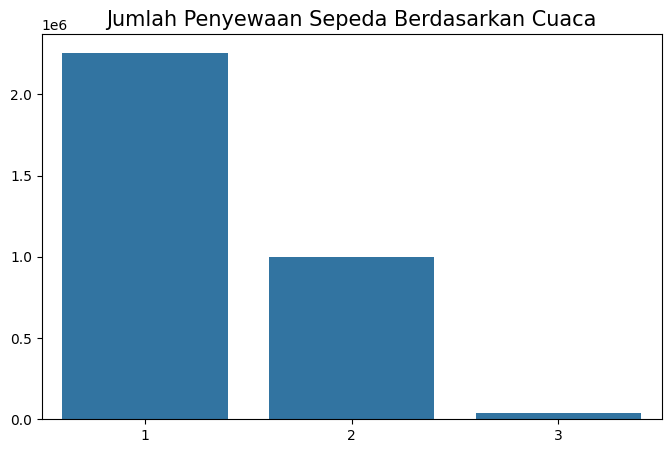

In [18]:
sum_rent_df = day_df.groupby("weathersit").cnt.sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8, 5))
 
sns.barplot(
    y="cnt", 
    x="weathersit",
    data = sum_rent_df.sort_values(by="weathersit", ascending=False),
)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Cuaca", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.show()

### Pertanyaan 2: Berapa pengaruh jenis musim terhadap jumlah sepeda yang disewakan?

In [19]:
sum_rent_df = day_df.groupby("season").cnt.sum().sort_values(ascending=False).reset_index()
sum_rent_df.head(5)

,season,cnt
0,3,1061129
1,2,918589
2,4,841613
3,1,471348


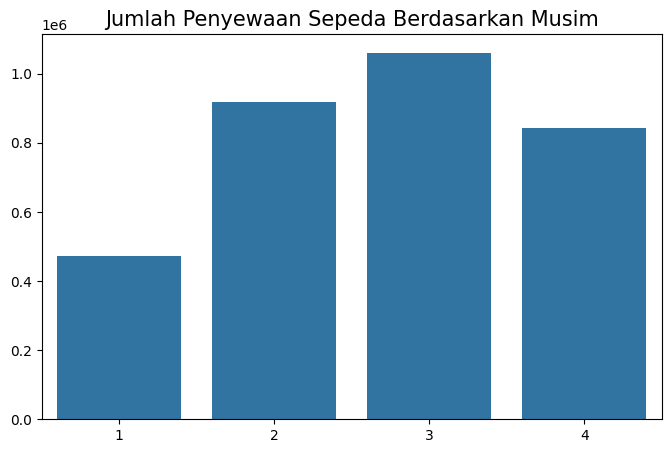

In [20]:
sum_rent_df = day_df.groupby("season").cnt.sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8, 5))
 
sns.barplot(
    y="cnt", 
    x="season",
    data = sum_rent_df.sort_values(by="season", ascending=False),
)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.show()

### Pertanyaan 3: Bagaimana peforma penyewaan sepeda setiap jam?

In [21]:
sum_rent_hour_df = hour_df.groupby("hr").cnt.sum().reset_index()
sum_rent_hour_df.head(5)

,hr,cnt
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428


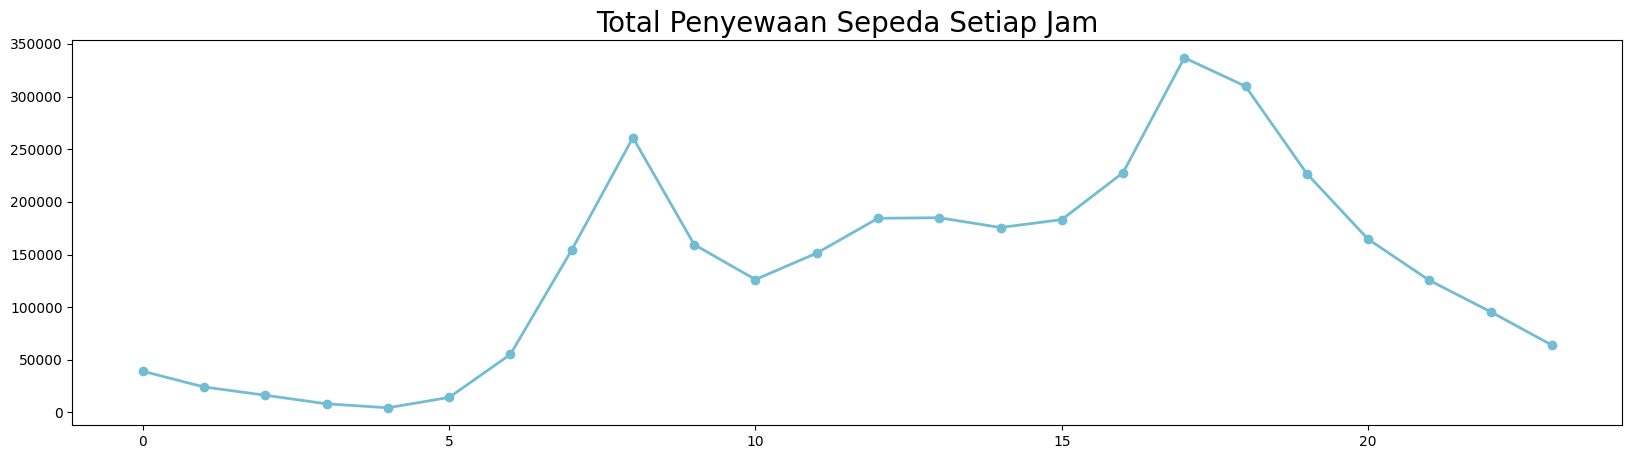

In [22]:
plt.figure(figsize=(20, 5))
plt.plot(
    sum_rent_hour_df["cnt"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Penyewaan Sepeda Setiap Jam", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [27]:
# RFM Analysis
rfm_df = hour_df.groupby(by="season", as_index=False).agg({
    "dteday": "max", # mengambil tanggal rental terakhir
    "mnth": "nunique", # menghitung jumlah bulan
    "cnt": "sum" # menghitung jumlah rental
})
rfm_df.columns = ["season", "max_rent_timestamp", "frequency", "monetary"]

rfm_df["max_rent_timestamp"] = rfm_df["max_rent_timestamp"].dt.date
recent_date = hour_df["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["max_rent_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_rent_timestamp", axis=1, inplace=True)
rfm_df.head()

,season,frequency,monetary,recency
0,1,4,471348,0
1,2,4,918589,194
2,3,4,1061129,100
3,4,4,841613,11


C:\Users\tanto\AppData\Local\Temp\ipykernel_22132\702603011.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="season", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\tanto\AppData\Local\Temp\ipykernel_22132\702603011.py:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(y="recency", x="season", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\tanto\AppData\Local\Temp\ipykernel_22132\702603011.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="season", data=rfm_df.sort_values(by="frequency", asce

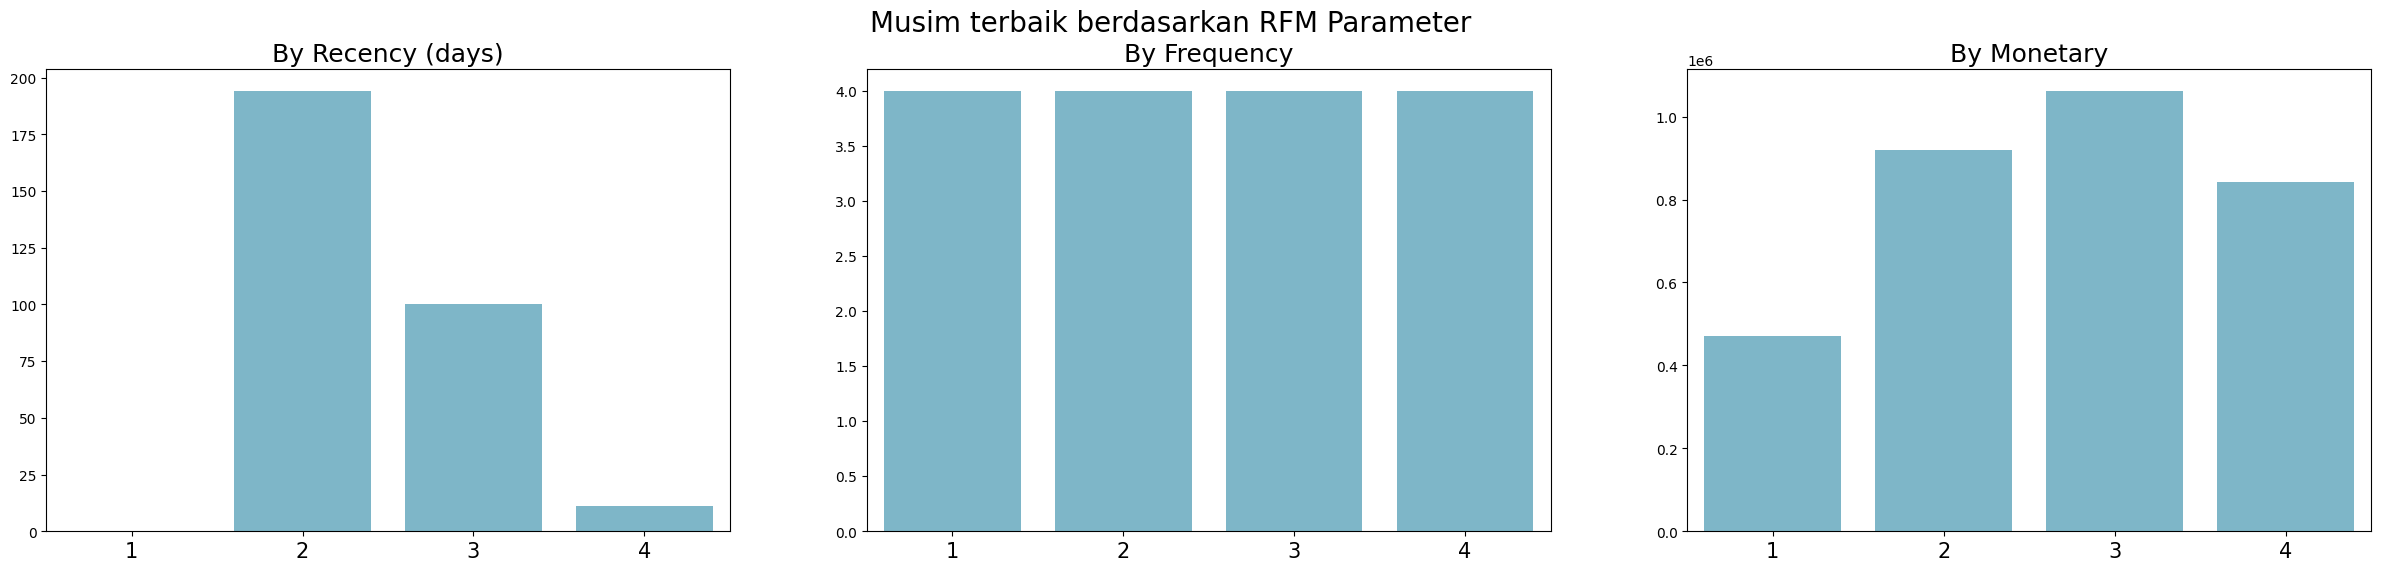

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="season", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="season", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="season", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Musim terbaik berdasarkan RFM Parameter", fontsize=20)
plt.show()

## Conclusion

#### Conclution pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
Jumlah penyewaan sepada paling banyak terjadi pada cuaca kategori 1 (_Clear, Few clouds, Partly cloudy, Partly cloudy_) dengan jumlah 2 kali lebih besar daripada jumlah penyewaan sepeda cuaca kategori 2 (_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist_). Jumlah penyewaan paling sedikit terjadi pada cuaca kategori 3 (_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds_). Selain itu, pada cuaca kategori 4 (_Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog_) tidak terjadi penyewaan sepeda.

### Conclution pertanyaan 2:  Berapa pengaruh jenis musim terhadap jumlah sepeda yang disewakan?
Penyewaan sepeda terjadi paling banyak pada musim 3 (_Fall_) dan paling sedikit pada musim 1 (_Springer_).

### Conclution pertanyaan 3: Bagaimana peforma penyewaan sepeda setiap jam?
Penyewaan sepeda mencapai puncak pada jam 17. Peforma penyewaan sepeda mengalami peningkatan yang signifikan pada jam 5 sampai jam 8. Setelah jam 8, penyewaan sepeda sedikit menurun dan kembali meningkat pada jam 15 hingga jam 17. Setelah jam 18, penyewaan sepeda mengalami penurunan signifikan sampai jam 23.

In [35]:
hour_df.to_csv("bike_data.csv", index=False)